In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing data set
data_test = pd.read_csv('E:\\download\\SalaryData_Test.csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data_train = pd.read_csv('E:\\download\\SalaryData_Train.csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Dimensions of the data set
data_test.shape

(15060, 14)

In [6]:
data_train.shape

(30161, 14)

In [8]:
# Summary of the data set
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


There is no null values

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


There is no null values

In [11]:
data_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [12]:
data_test[data_test.duplicated()].shape

(930, 14)

In [17]:
data1 = data_test.drop_duplicates()
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [18]:
data1[data1.duplicated()].shape

(0, 14)

In [19]:
data_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [20]:
data_train[data_train.duplicated()].shape

(3258, 14)

In [21]:
data2 = data_train.drop_duplicates()
data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [22]:
data2[data2.duplicated()].shape

(0, 14)

In [27]:
#Finding the special characters  
data1.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [28]:
data2.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There is no special character

In [33]:
# Finding categorical variables in the training data
cat1 = [var for var in data2.columns if data2[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(cat1)))
print('The categorical variables are :\n\n', cat1)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [32]:
# View the categorical variables in the data
data2[cat1].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [46]:
# Finding numerical variables in training data 
num1 = [var for var in data2.columns if data2[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(num1)))
print('The numerical variables are :', num1)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [47]:
# View the numerical variables
data2[num1].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [34]:
# checking missing values in categorical variables
data2[cat1].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [48]:
# Checking missing values in numerical variables
data2[num1].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

There is no missing values in both categorical data and numerical data

In [35]:
# Frequency counts of values in categorical variables
for var in cat1: 
    print(data2[var].value_counts())

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other

In [36]:
# Frequency distribution of categorical variables
for var in cat1: 
    print(data2[var].value_counts()/np.float(len(data2)))

 Private             0.714158
 Self-emp-not-inc    0.090362
 Local-gov           0.074862
 State-gov           0.046575
 Self-emp-inc        0.038992
 Federal-gov         0.034531
 Without-pay         0.000520
Name: workclass, dtype: float64
 HS-grad         0.307326
 Some-college    0.219046
 Bachelors       0.167379
 Masters         0.057912
 Assoc-voc       0.046686
 Assoc-acdm      0.036948
 11th            0.034978
 10th            0.028621
 7th-8th         0.020109
 Prof-school     0.019775
 9th             0.016690
 Doctorate       0.013530
 12th            0.013307
 5th-6th         0.010519
 1st-4th         0.005538
 Preschool       0.001636
Name: education, dtype: float64
 Married-civ-spouse       0.459837
 Never-married            0.311750
 Divorced                 0.149017
 Separated                0.034494
 Widowed                  0.030368
 Married-spouse-absent    0.013753
 Married-AF-spouse        0.000781
Name: maritalstatus, dtype: float64
 Prof-specialty       0.14061

In [37]:
# Checking labels in workclass column
data2.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [38]:
# Checking frequency distribution of values in workclass variable
data2.workclass.value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [39]:
# Checking labels in occupation column
data2.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [40]:
# Check frequency distribution of values in occupation column
data2.occupation.value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [41]:
# Checking labels in native country variable
data2.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [42]:
# Checking frequency distribution of values in native country column
data2.native.value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [43]:
# Cardility Checking
for var in cat1:
    print(var, ' contains ', len(data2[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [49]:
# Declairing independent and dependent variable
x = data2.drop(['Salary'], axis=1)
y = data2['Salary']

In [51]:
# Spliting x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [52]:
x_train.shape

(18832, 13)

In [54]:
x_test.shape

(8071, 13)

In [62]:
# Finding categorical varible in x_train
cat2 = [col for col in x_train.columns if x_train[col].dtypes == 'O']
cat2

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [63]:
# Categorical variables with missing data
for col in cat2:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

In [64]:
# Missing categorical variables with most frequent value
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(x_train['native'].mode()[0], inplace=True)  

In [65]:
# Ecode Categorical Variables
cat2

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [66]:
x_train[cat2].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
15045,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
27002,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
13028,Private,HS-grad,Married-civ-spouse,Other-service,Wife,White,Female,United-States
19009,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
15234,Private,1st-4th,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico


In [67]:
!pip install category_encoders

In [68]:
# Import category encoders
import category_encoders as ce

In [69]:
# Encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])
x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [70]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
15045,52,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27002,40,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13028,56,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19009,44,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15234,31,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
x_train.shape

(18832, 102)

In [72]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
14612,41,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18369,34,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17280,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7329,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11484,41,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
x_test.shape

(8071, 102)

In [74]:
# Feature Scaling 
cols = x_train.columns

In [75]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.105263,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Model Training
# Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [78]:
# Result prediction
y_pred = gnb.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [79]:
# Checking for accuracy 
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8019


In [82]:
# Comparesion of train-set and test-set accuracy
y_pred_train = gnb.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8008


In [84]:
# Checking for overfitting and underfitting
print('Training set score: {:0.4f}'.format(gnb.score(x_train, y_train)))
print('Test set score: {:0.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8008
Test set score: 0.8019


From this we can say that there is no overfitting

# Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4839 1191]
 [ 408 1633]]

True Positives(TP) =  4839

True Negatives(TN) =  1633

False Positives(FP) =  1191

False Negatives(FN) =  408


<AxesSubplot:>

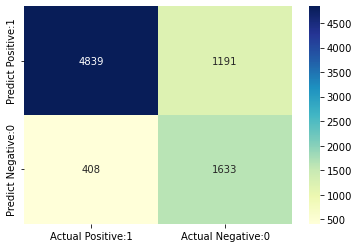

In [86]:
# Visualizing confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Matrix

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      6030
        >50K       0.58      0.80      0.67      2041

    accuracy                           0.80      8071
   macro avg       0.75      0.80      0.76      8071
weighted avg       0.84      0.80      0.81      8071



# Classification Accuracy

In [95]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy is : {0:0.4f}'.format(classification_accuracy))

Classification accuracy is : 0.8019


# Classification Error

In [96]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error is: {0:0.4f}'.format(classification_error))

Classification error is: 0.1981


# Precision

In [97]:
precision = TP / float(TP + FP)
print('Precision is: {0:0.4f}'.format(precision))

Precision is: 0.8025


# Sensitivity

In [99]:
Sensitivity = TP / float(TP + FN)
print('Sensitivity is: {0:0.4f}'.format(Sensitivity))

Sensitivity is: 0.9222


# Specificity

In [100]:
Specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(Specificity))

Specificity : 0.5783


# k-Fold Cross Validation

In [101]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80307856 0.81104034 0.81147106 0.80350505 0.79553903 0.80669145
 0.79660117 0.79713224 0.78651089 0.79341476]


In [102]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8005


In this problem I build a Gaussian Naïve Bayes Classifier model. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8019. Original model accuracy is 0.8019, and the mean cross-validation accuracy is 0.8005. 